###Import necessary libraries

In [184]:
from ultralytics import YOLO
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

###Import the trained model for detection

In [185]:
model = YOLO('/content/assets/best.pt')

###Preprocess Input Image for Detection Model

In [186]:
def preprocess_image(image_path):
  # For model trained on 416x416 images
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  height, width = image_rgb.shape[:2]
  aspect_ratio = width / height

  if width > height:
      new_width = 416
      new_height = int(416 / aspect_ratio)
  else:
      new_height = 416
      new_width = int(416 * aspect_ratio)

  image_resized = cv2.resize(image_rgb, (new_width, new_height))

  canvas = np.ones((416, 416, 3), dtype=np.uint8) * 255

  y_offset = (416 - new_height) // 2
  x_offset = (416 - new_width) // 2

  canvas[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = image_resized

  input_image = canvas.copy()
  return input_image

In [187]:
def detect_object(image_path):
  image = preprocess_image(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = model(image_rgb)
  return image, results

#Specify the Image path

In [188]:
image, results = detect_object('/content/assets/doko.jpg')

predictions = results[0].boxes.xyxy
confidences = results[0].boxes.conf
classes = results[0].boxes.cls

print("Boxes shape:", predictions.shape)
print("Confidences shape:", confidences.shape)
print("Classes shape:", classes.shape)


0: 416x416 9 dokos, 185.7ms
Speed: 2.2ms preprocess, 185.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Boxes shape: torch.Size([9, 4])
Confidences shape: torch.Size([9])
Classes shape: torch.Size([9])


###Display Detected Object with Bounding Boxes

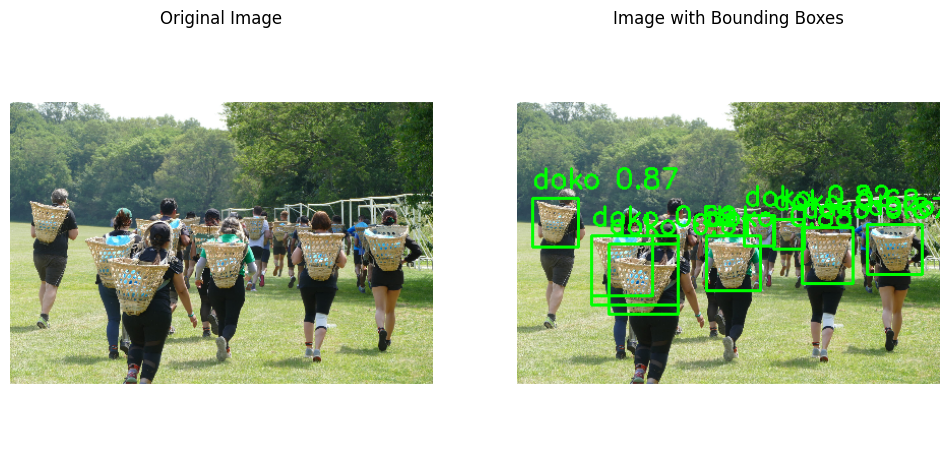

In [189]:
def display(image, results):
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  detection=image_rgb.copy()
  predictions = results[0].boxes.xyxy
  confidences = results[0].boxes.conf
  classes = results[0].boxes.cls

  for i in range(len(predictions)):
      x1, y1, x2, y2 = predictions[i]
      conf = confidences[i]
      cls = int(classes[i])

      cv2.rectangle(detection, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
      label = f'{model.names[cls]} {conf:.2f}'
      cv2.putText(detection, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  fig.subplots_adjust(wspace=0.2)

    # Display the original image on the left
  axes[0].imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
  axes[0].axis('off')
  axes[0].set_title("Original Image")

    # Display the image with bounding boxes on the right
  axes[1].imshow(cv2.cvtColor(detection, cv2.COLOR_BGR2RGB))
  axes[1].axis('off')
  axes[1].set_title("Image with Bounding Boxes")

  plt.show()
display(image,results)

###Example Inferences



0: 416x416 1 nepali topi, 194.5ms
Speed: 1.6ms preprocess, 194.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


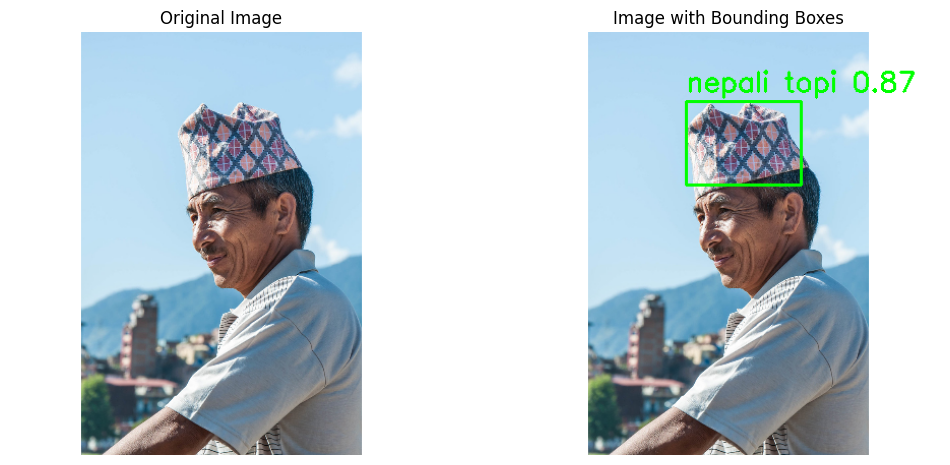

In [190]:
display(*(detect_object('/content/assets/topi.jpg')))


0: 416x416 1 aankhi jhyaal, 207.6ms
Speed: 1.6ms preprocess, 207.6ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)


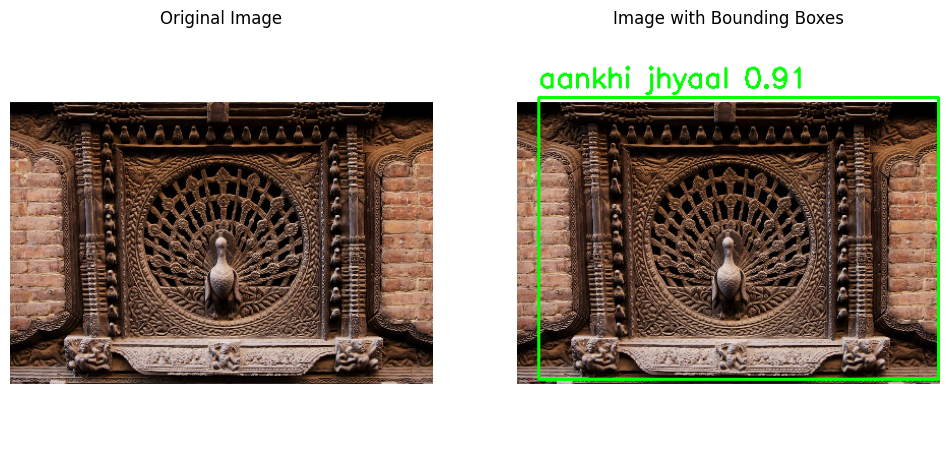

In [191]:
display(*(detect_object('/content/assets/jhyal.jpg')))


0: 416x416 1 karuwa, 125.7ms
Speed: 1.5ms preprocess, 125.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)


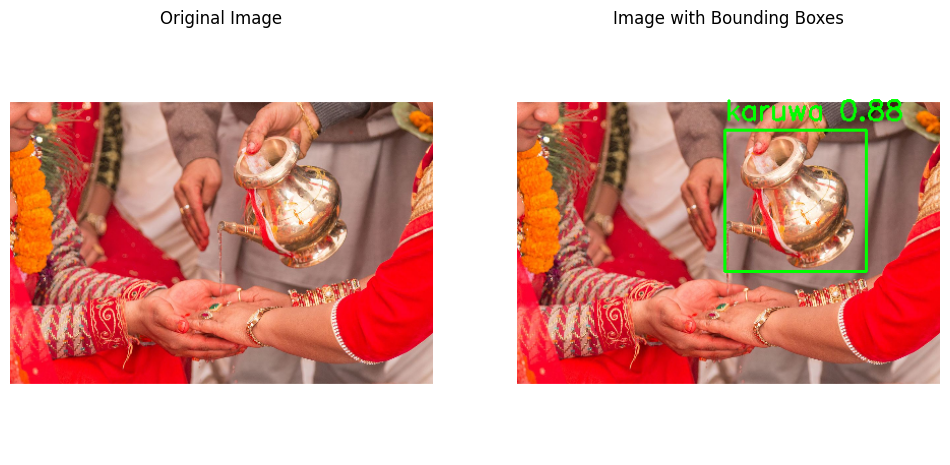

In [192]:
display(*(detect_object('/content/assets/karuwa.jpg')))


0: 416x416 1 stupa, 110.2ms
Speed: 1.6ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)


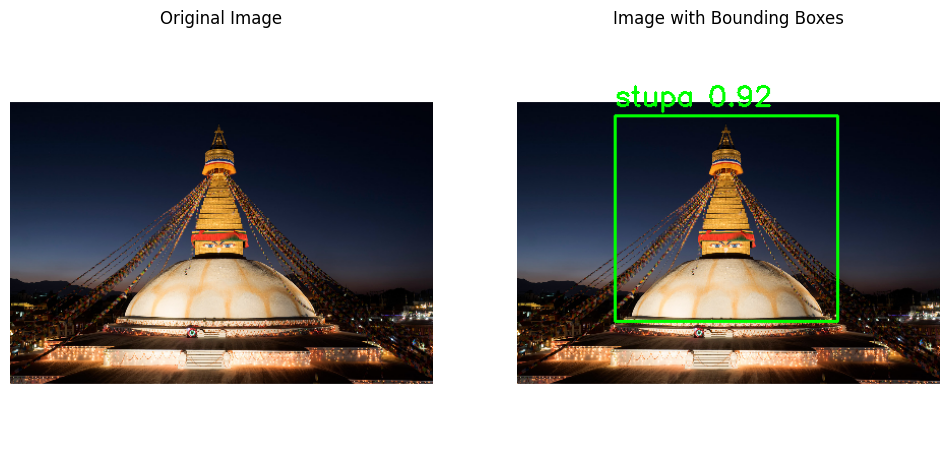

In [193]:
display(*(detect_object('/content/assets/stupa.jpg')))